# Array
- 요소를 sequential 하게 저장
- random access : index를 통해 각기 요소에 접근
- one-dimensional array (linear array)

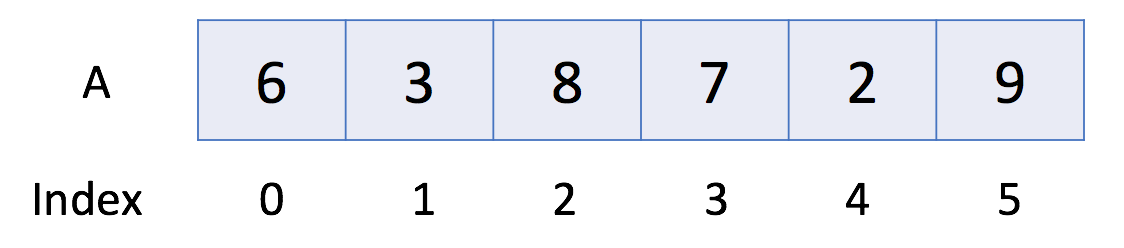

- 파이썬에서 배열(array)와 유사한 시퀀스 객체는 리스트(List)

In [32]:
B = [1,2]
A = [6,3,8,7,B,9]

# append, O(1)
A[-2].append(3) # same as B.append(3)
print("append() 결과 : " + str(A))
A[-2][len(A[-2]):] = [3] # same as B[len(B):] = [3]
print("append() 결과 : " + str(A))

# pop, O(1)
A[-2].pop() # pop() 된 요소 3을 반환
print('pop() 결과 : ' + str(A))

# index, O(n)
print('index(B) 결과 : ' + str(A.index(B)))
print('index(6) 결과 : ' + str(A.index(6)))

# remove, O(n)
A.remove(3) # 특정값을 반환하지 않음
print('remove(3) 결과 : ' + str(A))

# in (Membership operator), O(n)
a = 9
if a in A :
    print('a가 A 안에 있슈~')
else :
    print('없슈~')

# insert, O(n) - 지정한 인덱스에 삽입 후, 인덱스 항목들을 한칸씩 뒤로 미루어야함.
A.insert(len(A)-3, 20)
print('A 뒤에서 3번째 요소에 20을 넣은 결과 : ' + str(A))

append() 결과 : [6, 3, 8, 7, [1, 2, 3], 9]
append() 결과 : [6, 3, 8, 7, [1, 2, 3, 3], 9]
pop() 결과 : [6, 3, 8, 7, [1, 2, 3], 9]
index(B) 결과 : 4
index(6) 결과 : 0
remove(3) 결과 : [6, 8, 7, [1, 2, 3], 9]
a가 A 안에 있슈~
A 뒤에서 3번째 요소에 20을 넣은 결과 : [6, 8, 20, 7, [1, 2, 3], 9]


- in (Membership Test) 시, 빠른 속도가 필요하다면 셋(set)이나 딕셔너리(dictionary) 같은 컬렉션 타입을 사용하는 것이 좋습니다 :-)

# Dynamic Array
- 가변 길이의 배열
- C++ 에서는 vector, java에서는 ArrayList, python에서는 그냥 list를 사용하면됨.

# Q1. Find Pivot Index
- 정수 배열 nums
- 좌측 요소들의 합 == 우측 요소들의 합이 되면 pivot index
- nums 배열의 길이 0 ~ 10000, 각 요소의 값 범위는 -10000 ~ 10000

In [34]:
def pivotIndex(nums):
        # Time: O(n)
        # Space: O(1)
        left, right = 0, sum(nums)
        for index, num in enumerate(nums):
            right -= num
            if left == right:
                return index
            left += num
        return -1

print(pivotIndex([1, 3, 4, 2, 2]))

2


# Q2. Largest Number At Least Twice of Others

In [35]:
def dominantIndex(nums):
        m = max(nums)
        if all(m >= 2*x for x in nums if x != m):
            return nums.index(m)
        return -1
print(dominantIndex([3, 6, 1, 0]))

1


# Q3. Plus One

In [38]:
def plusOne(nums):
    num = 0
    for i in range(len(nums)):
    	num += nums[i] * pow(10, (len(nums)-1-i))
    return [int(i) for i in str(num+1)]
print(plusOne([4,3,2,1]))

[4, 3, 2, 2]


# Introduction to 2D Array
- 각 요소가 시퀀스

# Q1. Diagonal Traverse
- input : 
[
 [ 1, 2, 3 ],
 [ 4, 5, 6 ],
 [ 7, 8, 9 ]
]
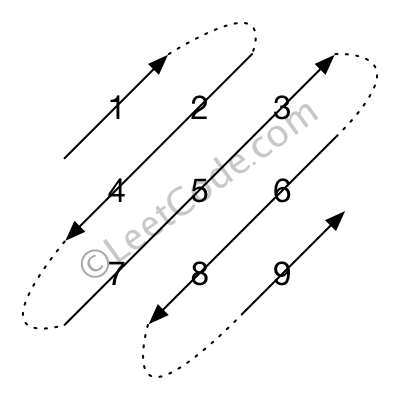

In [40]:
def findDiagonalOrder(matrix):
        
        if not matrix:
            return None

        r = len(matrix)
        c = len(matrix[0])
        
        rlt = []
        if r == 1:
            rlt.extend(matrix[0])
            return rlt
        if c == 1:
            while matrix:
                rlt.extend(matrix.pop(0))
            return rlt
        
        tmp = []
        rlt = [matrix[0][0]]
        flag = 0
        for j in range(1, c):   ## start from first row, store every anti-diagnoal line into "rlt" array
            cur_col = j
            row = 0
            while j >= 0 and row <= r-1:
                tmp.append(matrix[row][j])
                row += 1
                j -= 1
            if cur_col % 2 == 1:
                rlt.extend(tmp)
                flag = 0
            else:
                rlt.extend(tmp[::-1])
                flag = 1
            tmp = []
            
        for i in range(1, r):  ## start from second row last column, store every anti-diagnaoal line into "rlt" array
            cur_row = i
            cur_col = c-1
            while cur_row <= r-1 and cur_col >= 0:
                tmp.append(matrix[cur_row][cur_col])
                cur_row += 1
                cur_col -= 1
            if flag == 1:
                rlt.extend(tmp)
                flag = 0
            else:
                rlt.extend(tmp[::-1])
                flag = 1
            tmp = []
            
        return rlt

#### 다른 사람 답안
https://leetcode.com/problems/diagonal-traverse/discuss/405383/1-line-Python-3-solution

# Q2. Spiral Matrix

In [43]:
def spiralOrder(matrix):
        if not matrix: return []
        R, C = len(matrix), len(matrix[0])
        seen = [[False] * C for _ in matrix]
        ans = []
        dr = [0, 1, 0, -1]
        dc = [1, 0, -1, 0]
        r = c = di = 0
        for _ in range(R * C):
            ans.append(matrix[r][c])
            seen[r][c] = True
            cr, cc = r + dr[di], c + dc[di]
            if 0 <= cr < R and 0 <= cc < C and not seen[cr][cc]:
                r, c = cr, cc
            else:
                di = (di + 1) % 4
                r, c = r + dr[di], c + dc[di]
        return ans

# Q3. Pascal's Triangle
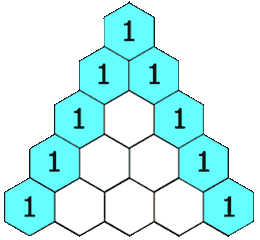

In [45]:
def generateTriangle(numRows):
        triangles = []
        for i in range(numRows):
            triangles.append([])
            for j in range(i + 1):
                if j == 0 or j == i:
                    triangles[i].append(1)
                else:
                    triangles[i].append(triangles[i - 1][j - 1] + triangles[i - 1][j])
        return triangles